In [34]:
import glob
import os
import pandas as pd

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter


In [ ]:
filePaths = [f for f in glob.glob(os.path.join('data', '*.csv'))]
# File names
fileNames = ['app_events', 'app_labels', 'events', 'ga_test', 'ga_train', 'labels', 'label_categories', 'pbdm', 'sample_sub']
# Create tuples for dictionary comprehension
fileKeyVal = zip(fileNames, filePaths)
# Create dictionary of files
fileDict = {name: pd.read_csv(file) for name, file in fileKeyVal}

fileDict.keys()

In [13]:
app_events = fileDict.get("app_events")
print(app_events.columns)

app_labels = fileDict.get("app_labels")
app_labels.columns

Index(['event_id', 'app_id', 'is_installed', 'is_active'], dtype='object')


Index(['app_id', 'label_id'], dtype='object')

In [19]:
ga_train = fileDict.get("ga_train")
print(ga_train.columns)
print(ga_train.describe(include='all'))


Index(['device_id', 'gender', 'age', 'group'], dtype='object')
           device_id gender           age   group
count   7.464500e+04  74645  74645.000000   74645
unique           NaN      2           NaN      12
top              NaN      M           NaN  M23-26
freq             NaN  47904           NaN    9605
mean   -7.491354e+14    NaN     31.410342     NaN
std     5.327150e+18    NaN      9.868735     NaN
min    -9.223067e+18    NaN      1.000000     NaN
25%    -4.617367e+18    NaN     25.000000     NaN
50%    -1.841362e+16    NaN     29.000000     NaN
75%     4.636656e+18    NaN     36.000000     NaN
max     9.222849e+18    NaN     96.000000     NaN


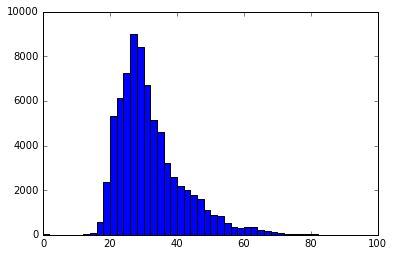

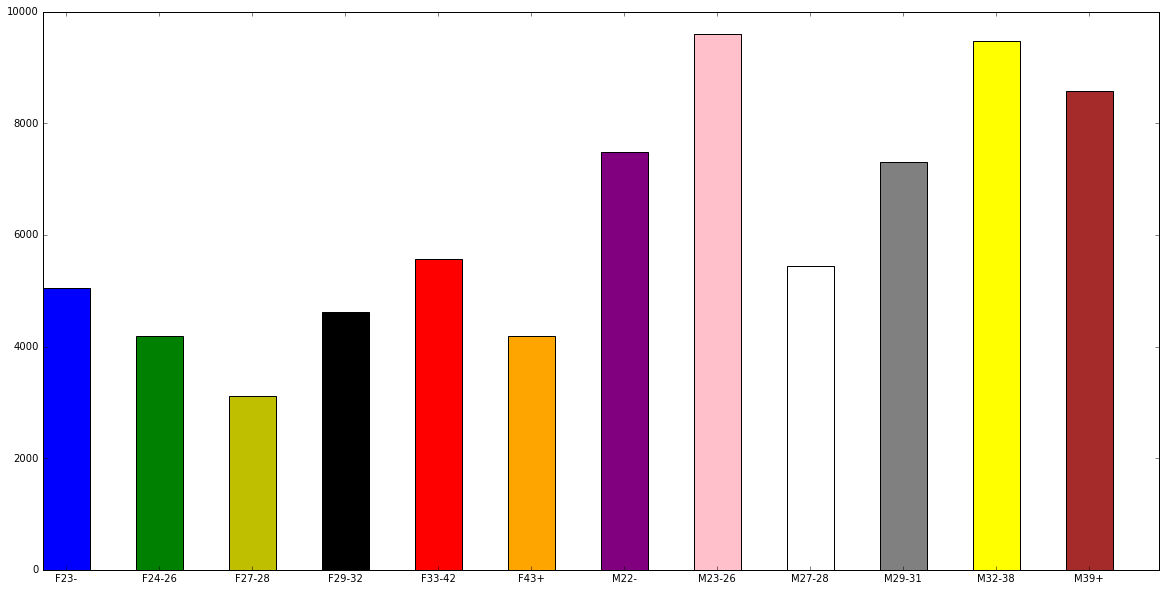

In [68]:
plt.hist(ga_train["age"], bins=50, range=[0,100])
plt.show()

labels, values = zip(*Counter(ga_train["group"]).items())
counts = pd.DataFrame({'labels' : labels, 'values' : values})
counts = counts.sort_values('labels')
indexes = np.arange(len(counts))
width = .5

plt.figure(figsize=(20,10))
plt.bar(indexes, counts['values'], width, color = ['b', 'g', 'y', 'k', 'r', 'orange', 'purple', 'pink', 'white', 'gray', 'yellow', 'brown'])
plt.xticks(indexes + width * 0.5, counts['labels'])
plt.show()

In [58]:
plt.bar?